<a href="https://colab.research.google.com/github/jskim16/MLproj/blob/main/%EC%95%8C%ED%8C%8C%EB%B2%B3%EC%9D%B8%EC%8B%9D_AI%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
import tensorflow as tf
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from google.colab import drive

In [18]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/A_Z Handwritten Data.csv').astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)

x = dataset.drop('label', axis = 1)
y = dataset['label']

train_images, test_images, train_labels, test_labels = train_test_split(x, y)

In [19]:
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(train_images)

train_images = minMaxScaler.transform(train_images)
test_images = minMaxScaler.transform(test_images)

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')

train_labels = np_utils.to_categorical(train_labels)
test_labels = np_utils.to_categorical(test_labels)

In [21]:
from keras import models
from keras import layers

In [22]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(48, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [45]:
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=20, batch_size=2048)

Epoch 1/20
137/137 [==============================] - 9s 63ms/step - loss: 0.0431 - accuracy: 0.9878 - val_loss: 0.0527 - val_accuracy: 0.9853
Epoch 2/20
137/137 [==============================] - 8s 59ms/step - loss: 0.0371 - accuracy: 0.9894 - val_loss: 0.0609 - val_accuracy: 0.9835
Epoch 3/20
137/137 [==============================] - 8s 59ms/step - loss: 0.0320 - accuracy: 0.9905 - val_loss: 0.0586 - val_accuracy: 0.9838
Epoch 4/20
137/137 [==============================] - 8s 60ms/step - loss: 0.0281 - accuracy: 0.9917 - val_loss: 0.0480 - val_accuracy: 0.9865
Epoch 5/20
137/137 [==============================] - 8s 59ms/step - loss: 0.0240 - accuracy: 0.9928 - val_loss: 0.0480 - val_accuracy: 0.9866
Epoch 6/20
137/137 [==============================] - 8s 58ms/step - loss: 0.0208 - accuracy: 0.9939 - val_loss: 0.0481 - val_accuracy: 0.9873
Epoch 7/20
137/137 [==============================] - 8s 59ms/step - loss: 0.0182 - accuracy: 0.9946 - val_loss: 0.0365 - val_accuracy: 0.9907

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

2910/2910 [==============================] - 10s 3ms/step - loss: 0.2436 - accuracy: 0.9276


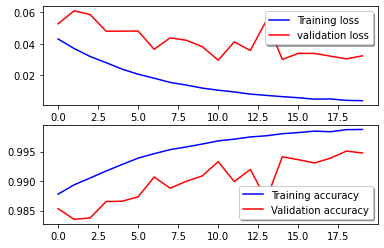

In [46]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [26]:
img = Image.open('/content/drive/MyDrive/Colab Notebooks/M.jpg')
img = img.resize((28, 28))
img_data = np.array(img)

In [27]:
trans_img = img_data.transpose(2, 0, 1)

In [28]:
trans_test_img = trans_img / 255.0

In [38]:
trans_test_img = trans_test_img.reshape(3, 28, 28, 1)

In [39]:
trans_test_img.shape

(3, 28, 28, 1)

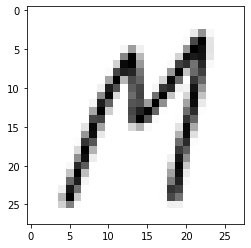

In [40]:
plt.imshow(img_data)

In [47]:
output = model.predict(trans_test_img)
print("결과는 : ", np.argmax(output))

결과는 :  12
